# K-Nearest Neighbours

In [ ]:
# required imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

In [4]:
# import the Iris dataset
from sklearn import datasets
dataset = datasets.load_iris()
#print(dataset.DESCR)

instances (N) 	 150 
 features (D) 	 2 
 classes (C) 	 3


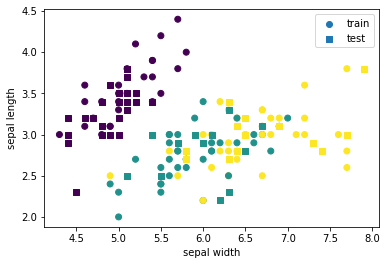

In [9]:
# use :2 to take only 2 out of the 4 features
# x is the input, y is the labels
x, y = dataset['data'][:,:2], dataset['target']
# classes are typically zero-indexed, so add 1 to the max
(N, D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

inds = np.random.permutation(N)
# train-test split
# take the first 100 for training
x_train, y_train = x[inds[:100]], y[inds[:100]]
# take the last 50 as test values
x_test, y_test = x[inds[100:]], y[inds[100:]]
# visualization
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.show()

In [11]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
    def __init__(self, K=1, dist_fn=euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        """
        This is where we train the data. However, for KNN there's no 
        training to be done, so we just store the input values and labels.
        """
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        """
        This is where we classify all test inputs. x_test is a numpy array
        containg all test inputs.
        """
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:]) # num_test x num_train
        y_prob = np.zeros((x_test.shape[0], self.C))
        knns = np.zeros((x_test.shape[0], self.K), dtype=int)
        
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)
        y_prob /= np.sum(y_prob,1,keepdims=True)
        
        return y_prob, knns

[[0.72801099 1.5        0.2        ... 0.84852814 1.50332964 1.48660687]
 [0.84852814 1.61245155 0.60827625 ... 0.72801099 1.83575598 1.21655251]
 [0.80622577 1.60312195 0.14142136 ... 0.70710678 1.41421356 1.3453624 ]
 ...
 [0.92195445 1.7        0.28284271 ... 0.72111026 1.30384048 1.3453624 ]
 [1.41421356 2.2        0.72801099 ... 0.60827625 0.80622577 1.07703296]
 [0.70710678 1.47648231 0.53851648 ... 0.80622577 1.87882942 1.33416641]]
[[0.         0.33333333 0.66666667]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0. 

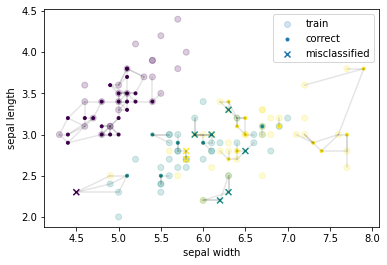

In [13]:
model = KNN(K=3)
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
# visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

# connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.legend()
plt.show()